In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify #algorithm for treemap

In [5]:
#explore title.basics which is the main list of movies in the IMDB database
df_tb = pd.read_csv('title.basics.tsv', sep = '\t')

/var/folders/7n/c5dgknmx1d33k3wm1tvccwwr0000gn/T/ipykernel_72098/2912343610.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tb = pd.read_csv('title.basics.tsv', sep = '\t')


In [19]:
df_tb.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short

In [4]:
#the current database holds almost 10 million titles
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9854354 entries, 0 to 9854353
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 676.6+ MB


In [18]:
#check for empty values
df_tb.isna().sum()

tconst             0
titleType          0
primaryTitle      11
originalTitle     11
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            15
dtype: int64

In [5]:
#there are different types of movies
df_tb['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [6]:
#about 645k titles are cinema-type movies
df_tb['titleType'].value_counts()

tvEpisode       7484584
short            930646
movie            645199
video            274105
tvSeries         243458
tvMovie          141537
tvMiniSeries      48562
tvSpecial         41568
videoGame         34588
tvShort           10106
tvPilot               1
Name: titleType, dtype: int64

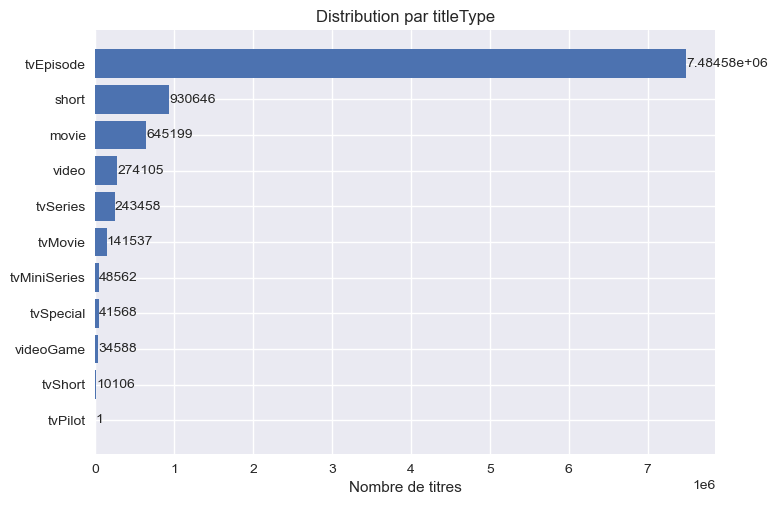

In [51]:
x = df_tb['titleType'].value_counts().sort_values()
y = df_tb['titleType'].value_counts().sort_values().index

fig, ax = plt.subplots()
#fig.suptitle('Distribution par titleType')

ax1 = plt.subplot() 
ax1.barh(y, width = x)
ax1.set_title('Distribution par titleType')
plt.xlabel('Nombre de titres')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('title_type.png')

In [41]:
#install squarify to create treemaps
pip install squarify

Note: you may need to restart the kernel to use updated packages.


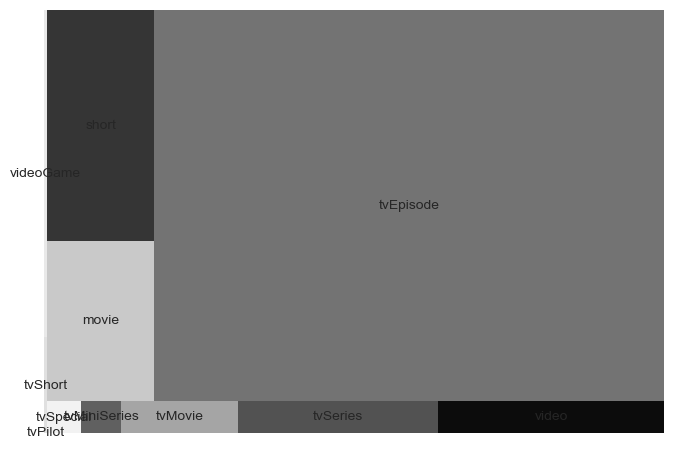

In [52]:
x = df_tb['titleType'].value_counts().sort_values().index
y = df_tb['titleType'].value_counts().sort_values()

squarify.plot(label = x, sizes = y)
plt.axis('off')
plt.show()

In [20]:
#filter on movies only
df_tb_movies = df_tb.loc[df_tb['titleType'] == 'movie']

In [22]:
#number of lines with value '\N' in column startYear 
len(df_tb_movies.loc[df_tb_movies['startYear'].str.contains(r'\\N')])

90702

In [28]:
df_tb_movies.loc[df_tb_movies['startYear'].str.contains(r'\\N')].index

Int64Index([  20798,   78451,   92077,  109087,  115773,  117961,  118099,
             118174,  118184,  118185,
            ...
            9853651, 9853716, 9853751, 9853840, 9853863, 9853995, 9854010,
            9854031, 9854035, 9854244],
           dtype='int64', length=90702)

In [22]:
#remove all lines with '\N' in column startYear 
df_tb_movies = df_tb_movies.drop(df_tb_movies.loc[df_tb_movies['startYear'].str.contains(r'\\N')].index)

In [23]:
#count number of movies by year
df_tb_movies.groupby(by = 'startYear')['tconst'].count()

startYear
1894     1
1896     1
1897     2
1898     7
1899     8
        ..
2026    29
2027    10
2028     1
2029     3
2030     1
Name: tconst, Length: 136, dtype: int64

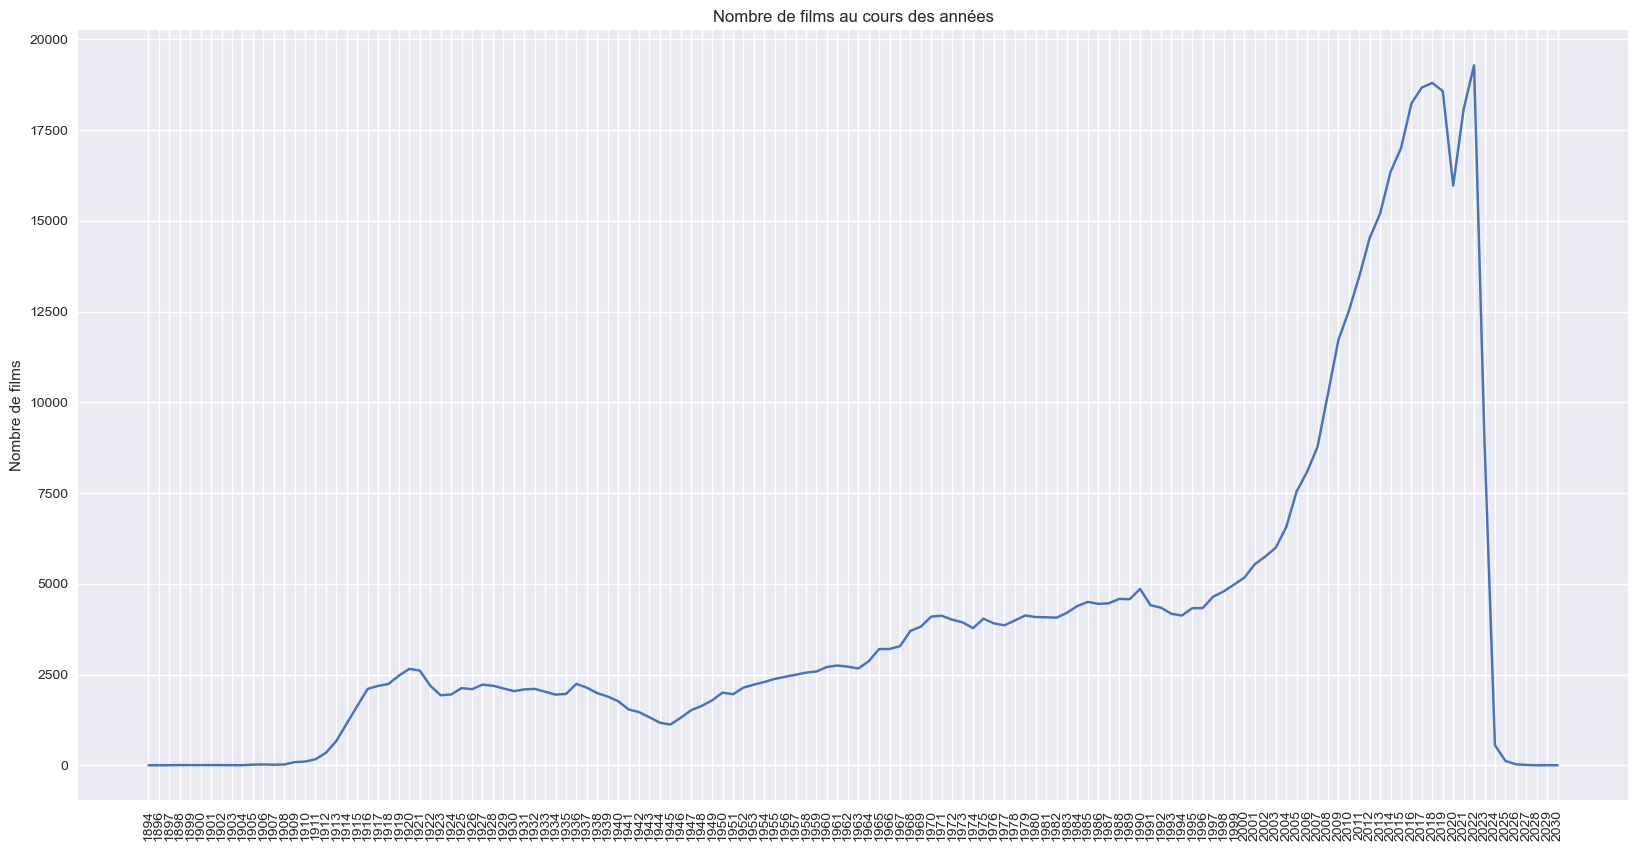

In [56]:
#the number of movies has sharply risen since around 2000 with a significant drop during the Covid period
x = df_tb_movies.groupby(by = 'startYear')['tconst'].count().index
y = df_tb_movies.groupby(by = 'startYear')['tconst'].count()

fig, ax = plt.subplots(figsize=(20,10))
#fig.suptitle('Nombre de films au cours des années')

ax1 = plt.subplot() 
ax1.plot(x, y)
ax1.set_title('Nombre de films au cours des années')
plt.xticks(rotation=90)
plt.ylabel('Nombre de films')
plt.style.use('seaborn')

plt.show()
fig.savefig('number_movies.png')

In [26]:
df_tb_series = df_tb.loc[df_tb['titleType'] == 'tvSeries']

In [27]:
df_tb_series = df_tb_series.drop(df_tb_series.loc[df_tb_series['startYear'].str.contains(r'\\N')].index)

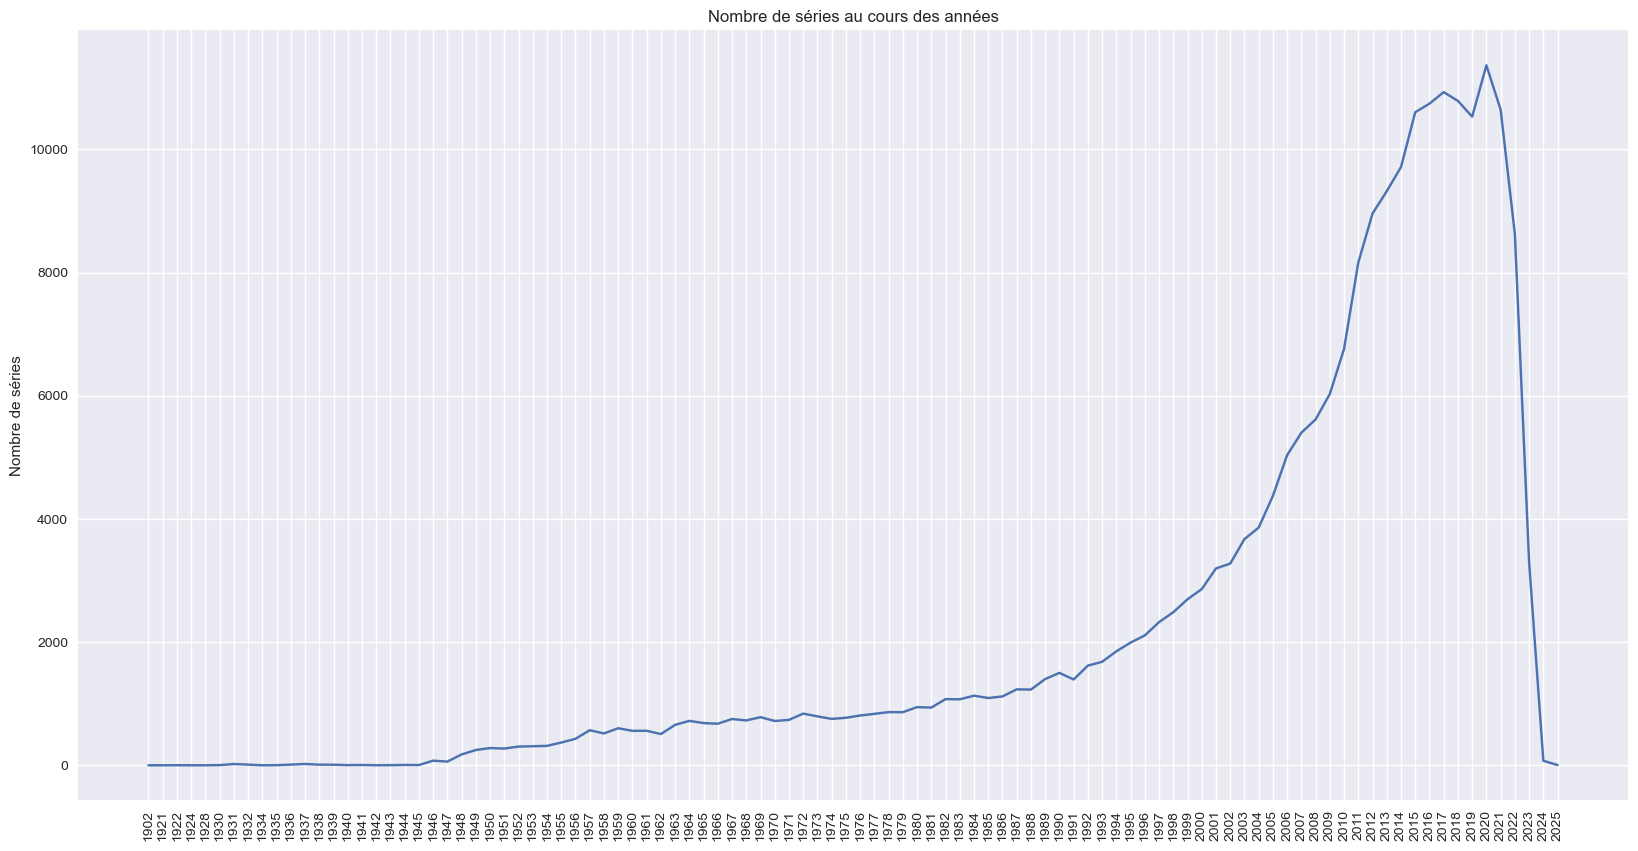

In [28]:
#the same trend can be observed for TV series
x = df_tb_series.groupby(by = 'startYear')['tconst'].count().index
y = df_tb_series.groupby(by = 'startYear')['tconst'].count()

fig, ax = plt.subplots(figsize=(20,10))
#fig.suptitle('Nombre de séries au cours des années')

ax1 = plt.subplot() 
ax1.plot(x, y)
ax1.set_title('Nombre de séries au cours des années')
plt.xticks(rotation=90)
plt.ylabel('Nombre de séries')
plt.style.use('seaborn')

plt.show()
#fig.savefig('number_series.png')

In [53]:
#explore title.akas which contains information about the distribution of movies by region
df_ta = pd.read_csv('title.akas.tsv', sep='\t')

/var/folders/7n/c5dgknmx1d33k3wm1tvccwwr0000gn/T/ipykernel_72098/1667688044.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ta = pd.read_csv('title.akas.tsv', sep='\t')


In [53]:
df_ta.head()

titleId  ordering                      title region language  \
0  tt0000001         1                 Карменсіта     UA       \N   
1  tt0000001         2                 Carmencita     DE       \N   
2  tt0000001         3  Carmencita - spanyol tánc     HU       \N   
3  tt0000001         4                 Καρμενσίτα     GR       \N   
4  tt0000001         5                 Карменсита     RU       \N   

         types     attributes isOriginalTitle  
0  imdbDisplay             \N               0  
1           \N  literal title               0  
2  imdbDisplay             \N               0  
3  imdbDisplay             \N               0  
4  imdbDisplay             \N               0

In [56]:
df_ta.isna().sum()

titleId              0
ordering             0
title                5
region             111
language             0
types                0
attributes           0
isOriginalTitle      0
dtype: int64

In [55]:
df_ta['region'].unique()

array(['UA', 'DE', 'HU', 'GR', 'RU', 'US', '\\N', 'JP', 'FR', 'RO', 'GB',
       'CA', 'PT', 'AU', 'ES', 'FI', 'PL', 'AR', 'RS', 'UY', 'IT', 'BR',
       'DK', 'TR', 'XWW', 'XEU', 'SK', 'CZ', 'SE', 'NZ', 'MX', 'NO',
       'XYU', 'AT', 'VE', 'CSHH', 'SI', 'SUHH', 'IN', 'TW', 'LT', 'NL',
       'CO', 'IR', 'BG', 'SG', 'BE', 'VN', 'HR', 'PH', 'DZ', 'CH', 'BF',
       'XWG', 'HK', 'CN', 'XSA', 'EC', 'EE', 'IS', 'PR', 'DDDE', 'IL',
       'EG', 'XKO', 'CL', 'IE', 'JM', 'KR', 'PE', 'GE', 'BY', 'BA', 'AE',
       'PA', 'TH', 'ZA', 'TJ', 'XSI', 'MY', 'LV', 'ID', 'PK', 'BD', 'CU',
       'AL', 'BO', 'XAS', 'CR', 'PY', 'DO', 'GT', 'SV', 'UZ', 'BUMM',
       'YUCS', 'XPI', 'BJ', 'AZ', 'SY', 'NG', 'CM', 'MA', 'GL', 'MN',
       'LI', 'LU', 'MZ', 'BM', 'KZ', 'MD', 'LB', 'IQ', 'TM', 'MK', 'TN',
       'HT', 'AM', 'LK', 'ME', 'CG', 'CI', 'NP', 'QA', 'TO', 'SN', 'GH',
       'JO', 'KP', 'KG', 'NE', 'GN', 'VDVN', 'TD', 'SO', 'SD', 'MC', 'TT',
       'GA', 'BS', 'LY', 'AO', 'KH', 'MR', 'AF', 'MG', 'ML'

In [57]:
#the region FR holds more than 400k titles (including movies, series etc.)
df_ta['region'].value_counts()

DE    4299273
FR    4295086
JP    4293704
IN    4234823
ES    4215019
       ...   
JE          2
NU          1
TV          1
PW          1
NR          1
Name: region, Length: 248, dtype: int64

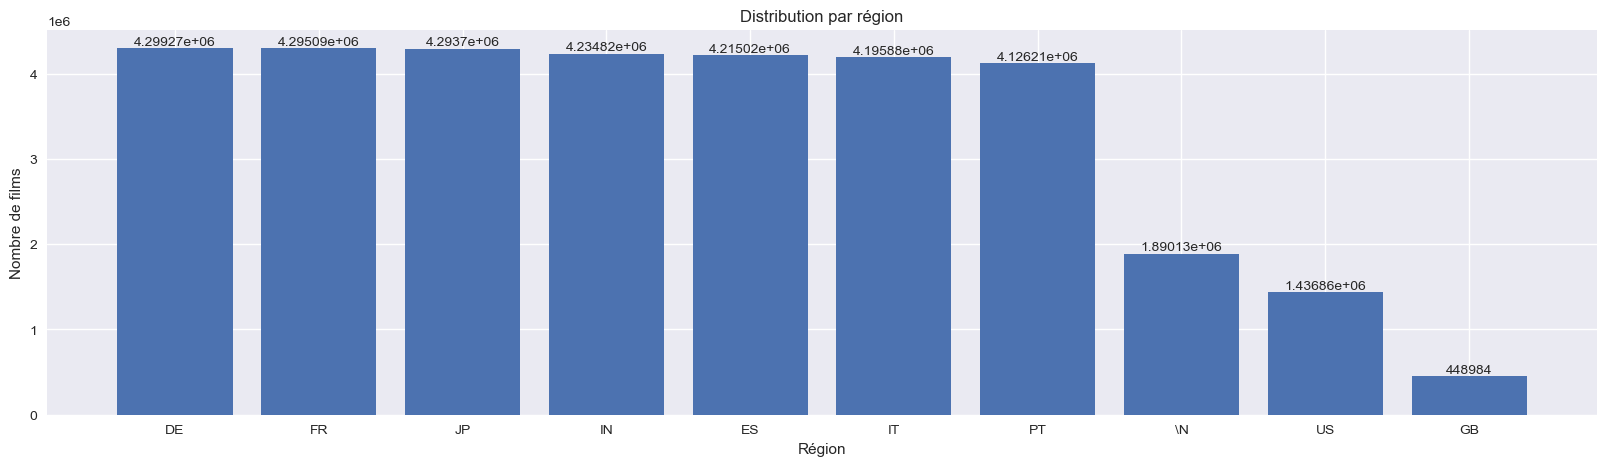

In [54]:
#the FR region is the second region with the most titles
x = df_ta['region'].value_counts().head(10).index
y = df_ta['region'].value_counts().head(10)

fig, ax = plt.subplots(figsize = (20,5))
#fig.suptitle('Distribution par région')

ax1 = plt.subplot() 
ax1.bar(x, y)
ax1.set_title('Distribution par région')
plt.xlabel('Région')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.ylabel('Nombre de films')
plt.style.use('seaborn')

plt.show()
#fig.savefig('regions.png')

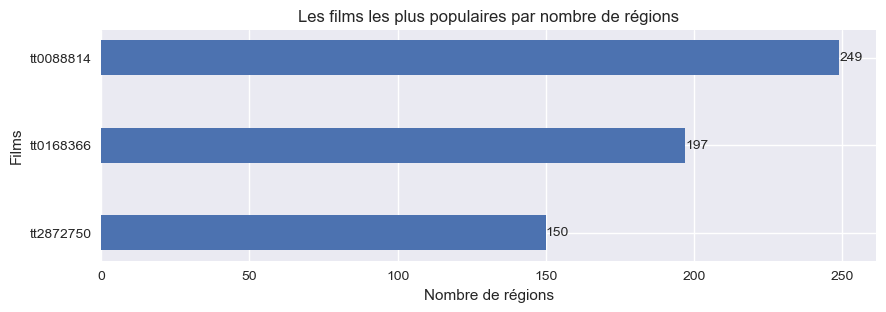

In [77]:
#check which movie is the most popular by number of regions
x = df_ta['titleId'].value_counts().head(3).sort_values()
y = df_ta['titleId'].value_counts().head(3).sort_values().index

fig, ax = plt.subplots(figsize = (10,3))
#fig.suptitle('Les films les plus populaires par nombre de régions')

ax1 = plt.subplot() 
ax1.barh(y, width = x, height = 0.4)
ax1.set_title('Les films les plus populaires par nombre de régions')
plt.xlabel('Nombre de régions')
plt.ylabel('Films')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('regions2.png')

In [68]:
df_tb.loc[df_tb['tconst'] == 'tt0088814']

tconst titleType        primaryTitle       originalTitle isAdult  \
86863  tt0088814     movie  The Black Cauldron  The Black Cauldron       0   

      startYear endYear runtimeMinutes                      genres  
86863      1985      \N             80  Action,Adventure,Animation

In [6]:
#explore title.principals which contains the list of actors for every movie
df_tp = pd.read_csv('title.principals.tsv', sep='\t')

In [83]:
df_tp.head()

tconst  ordering     nconst         category                      job  \
0  tt0000001         1  nm1588970             self                       \N   
1  tt0000001         2  nm0005690         director                       \N   
2  tt0000001         3  nm0374658  cinematographer  director of photography   
3  tt0000002         1  nm0721526         director                       \N   
4  tt0000002         2  nm1335271         composer                       \N   

  characters  
0   ["Self"]  
1         \N  
2         \N  
3         \N  
4         \N

In [7]:
df_tp = df_tp.loc[df_tp['category'].str.contains('actor|actress')]

In [85]:
df_tp['category'].unique()

array(['actor', 'actress'], dtype=object)

In [91]:
df_tp['category'].value_counts(True)

actor      0.563641
actress    0.436359
Name: category, dtype: float64

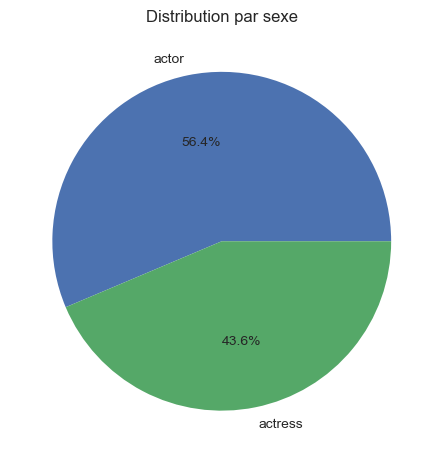

In [94]:
labels = df_tp['category'].value_counts(True).index
sizes = df_tp['category'].value_counts(True)

fig, ax = plt.subplots()
#fig.suptitle('Distribution par sexe')

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Distribution par sexe')

plt.show()
#fig.savefig('gender.png')

In [8]:
df_tb2 = df_tb[['tconst', 'titleType']]

In [9]:
#merge title.principals and title.basics to know if an actor played in a movie or TV series
df_tp = pd.merge(df_tp, df_tb2, how = 'left', on = ['tconst'])

In [10]:
df_nb = pd.read_csv('name.basics.tsv', sep = '\t')

In [117]:
df_nb.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [11]:
df_nb = df_nb[['nconst', 'primaryName']]

In [12]:
#merge title.principals and name.basics to get the primaryName for every actor
df_tp = pd.merge(df_tp, df_nb, how = 'left', on = ['nconst'])

In [13]:
df_tp.head()

tconst  ordering     nconst category job        characters titleType  \
0  tt0000005         1  nm0443482    actor  \N    ["Blacksmith"]     short   
1  tt0000005         2  nm0653042    actor  \N     ["Assistant"]     short   
2  tt0000007         1  nm0179163    actor  \N                \N     short   
3  tt0000007         2  nm0183947    actor  \N                \N     short   
4  tt0000008         1  nm0653028    actor  \N  ["Sneezing Man"]     short   

        primaryName  
0    Charles Kayser  
1          John Ott  
2  James J. Corbett  
3    Peter Courtney  
4          Fred Ott

In [14]:
df_actor_movie = df_tp.loc[(df_tp['category']=='actor') & (df_tp['titleType']=='movie')]

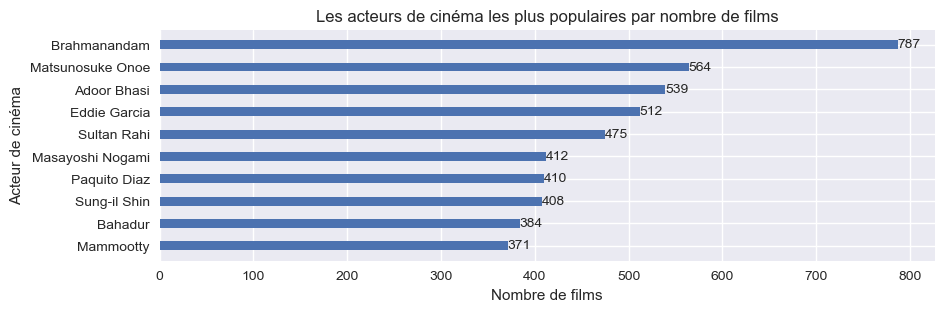

In [39]:
x = df_actor_movie['primaryName'].value_counts().head(10).sort_values()
y = df_actor_movie['primaryName'].value_counts().head(10).sort_values().index

fig, ax = plt.subplots(figsize = (10,3))
#fig.suptitle('Les acteurs de cinéma les plus populaires par nombre de films')

ax1 = plt.subplot() 
ax1.barh(y, width = x, height = 0.4)
ax1.set_title('Les acteurs de cinéma les plus populaires par nombre de films')
plt.xlabel('Nombre de films')
plt.ylabel('Acteur de cinéma')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('actor_movie.png')

In [40]:
df_actress_movie = df_tp.loc[(df_tp['category']=='actress') & (df_tp['titleType']=='movie')]

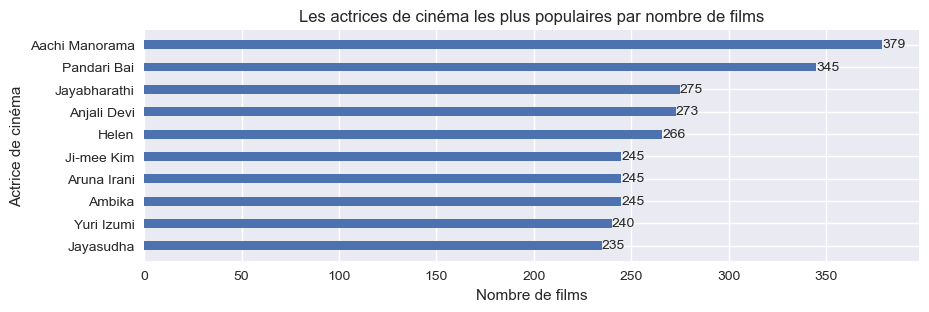

In [41]:
x = df_actress_movie['primaryName'].value_counts().head(10).sort_values()
y = df_actress_movie['primaryName'].value_counts().head(10).sort_values().index

fig, ax = plt.subplots(figsize = (10,3))
#fig.suptitle('Les actrices de cinéma les plus populaires par nombre de films')

ax1 = plt.subplot() 
ax1.barh(y, width = x, height = 0.4)
ax1.set_title('Les actrices de cinéma les plus populaires par nombre de films')
plt.xlabel('Nombre de films')
plt.ylabel('Actrice de cinéma')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('actress_movie.png')

In [45]:
df_actor_series = df_tp.loc[(df_tp['category']=='actor') & (df_tp['titleType']=='tvSeries')]

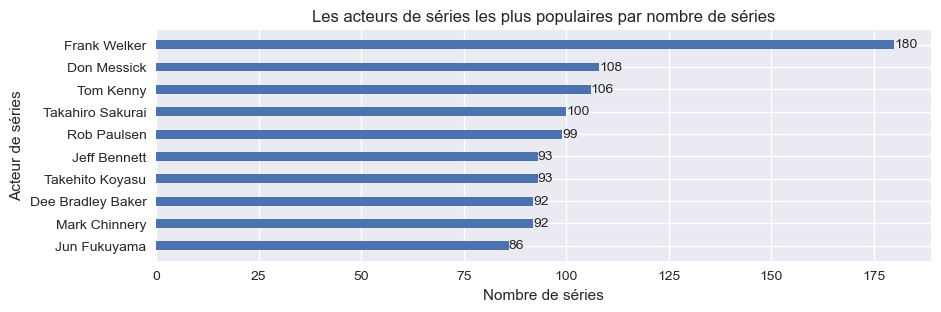

In [46]:
x = df_actor_series['primaryName'].value_counts().head(10).sort_values()
y = df_actor_series['primaryName'].value_counts().head(10).sort_values().index

fig, ax = plt.subplots(figsize = (10,3))
#fig.suptitle('Les acteurs de séries les plus populaires par nombre de séries')

ax1 = plt.subplot() 
ax1.barh(y, width = x, height = 0.4)
ax1.set_title('Les acteurs de séries les plus populaires par nombre de séries')
plt.xlabel('Nombre de séries')
plt.ylabel('Acteur de séries')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('actor_series.png')

In [47]:
df_actress_series = df_tp.loc[(df_tp['category']=='actress') & (df_tp['titleType']=='tvSeries')]

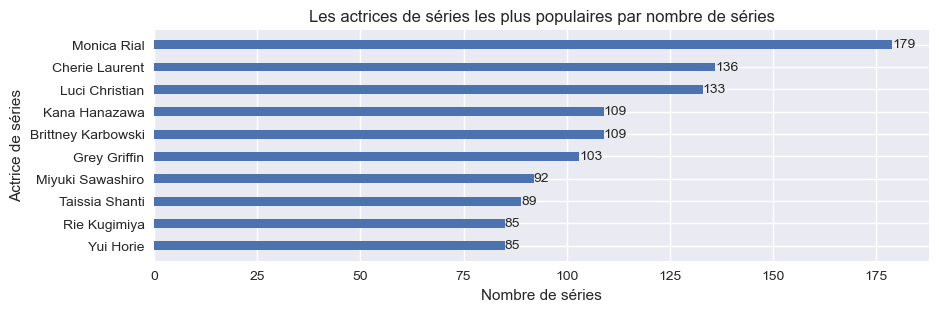

In [48]:
x = df_actress_series['primaryName'].value_counts().head(10).sort_values()
y = df_actress_series['primaryName'].value_counts().head(10).sort_values().index

fig, ax = plt.subplots(figsize = (10,3))
#fig.suptitle('Les actrices de séries les plus populaires par nombre de séries')

ax1 = plt.subplot() 
ax1.barh(y, width = x, height = 0.4)
ax1.set_title('Les actrices de séries les plus populaires par nombre de séries')
plt.xlabel('Nombre de séries')
plt.ylabel('Actrice de séries')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.style.use('seaborn')

plt.show()
#fig.savefig('actress_series.png')